In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras as k
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df11 = pd.read_csv('mc11.csv')
df11

,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,pred
0,1.509085e+06,2.169688e+06,3.188943e+06,1.115034e+07,7.284337e+06,4.360316e+06,3.706592e+06,5.644793e+06,9.075938e+06,8.194483e+06,8.836621e+06
1,2.169688e+06,3.188943e+06,1.115034e+07,7.284337e+06,4.360316e+06,3.706592e+06,5.644793e+06,9.075938e+06,8.194483e+06,8.836621e+06,8.016604e+06
2,3.188943e+06,1.115034e+07,7.284337e+06,4.360316e+06,3.706592e+06,5.644793e+06,9.075938e+06,8.194483e+06,8.836621e+06,8.016604e+06,7.374149e+06
3,1.115034e+07,7.284337e+06,4.360316e+06,3.706592e+06,5.644793e+06,9.075938e+06,8.194483e+06,8.836621e+06,8.016604e+06,7.374149e+06,7.634717e+06
4,7.284337e+06,4.360316e+06,3.706592e+06,5.644793e+06,9.075938e+06,8.194483e+06,8.836621e+06,8.016604e+06,7.374149e+06,7.634717e+06,7.270542e+06
...,...,...,...,...,...,...,...,...,...,...,...
2898,3.521089e+10,4.187661e+10,3.948579e+10,4.368156e+10,5.086034e+10,4.867299e+10,5.717780e+10,7.008193e+10,8.514718e+10,7.520778e+10,8.868082e+10
2899,4.187661e+10,3.948579e+10,4.368156e+10,5.086034e+10,4.867299e+10,5.717780e+10,7.008193e+10,8.514718e+10,7.520778e+10,8.868082e+10,8.242978e+10
2900,3.948579e+10,4.368156e+10,5.086034e+10,4.867299e+10,5.717780e+10,7.008193e+10,8.514718e+10,7.520778e+10,8.868082e+10,8.242978e+10,7.384194e+10
2901,4.368156e+10,5.086034e+10,4.867299e+10,5.717780e+10,7.008193e+10,8.514718e+10,7.520778e+10,8.868082e+10,8.242978e+10,7.384194e+10,5.829061e+10


In [3]:
df11_y = df11.pop('pred')
df11_y

0       8.836621e+06
1       8.016604e+06
2       7.374149e+06
3       7.634717e+06
4       7.270542e+06
            ...     
2898    8.868082e+10
2899    8.242978e+10
2900    7.384194e+10
2901    5.829061e+10
2902    6.416163e+10
Name: pred, Length: 2903, dtype: float64

In [4]:
df11 = df11.to_numpy()
df11

array([[1.50908500e+06, 2.16968800e+06, 3.18894300e+06, ...,
        5.64479300e+06, 9.07593800e+06, 8.19448300e+06],
       [2.16968800e+06, 3.18894300e+06, 1.11503390e+07, ...,
        9.07593800e+06, 8.19448300e+06, 8.83662100e+06],
       [3.18894300e+06, 1.11503390e+07, 7.28433700e+06, ...,
        8.19448300e+06, 8.83662100e+06, 8.01660400e+06],
       ...,
       [3.94857867e+10, 4.36815595e+10, 5.08603355e+10, ...,
        7.52077821e+10, 8.86808243e+10, 8.24297815e+10],
       [4.36815595e+10, 5.08603355e+10, 4.86729856e+10, ...,
        8.86808243e+10, 8.24297815e+10, 7.38419429e+10],
       [5.08603355e+10, 4.86729856e+10, 5.71778029e+10, ...,
        8.24297815e+10, 7.38419429e+10, 5.82906053e+10]])

In [5]:
df11_y = df11_y.to_numpy()
df11_y

array([8.83662100e+06, 8.01660400e+06, 7.37414900e+06, ...,
       7.38419429e+10, 5.82906053e+10, 6.41616346e+10])

In [6]:
df11 = df11.transpose()
df11

array([[1.50908500e+06, 2.16968800e+06, 3.18894300e+06, ...,
        3.94857867e+10, 4.36815595e+10, 5.08603355e+10],
       [2.16968800e+06, 3.18894300e+06, 1.11503390e+07, ...,
        4.36815595e+10, 5.08603355e+10, 4.86729856e+10],
       [3.18894300e+06, 1.11503390e+07, 7.28433700e+06, ...,
        5.08603355e+10, 4.86729856e+10, 5.71778029e+10],
       ...,
       [5.64479300e+06, 9.07593800e+06, 8.19448300e+06, ...,
        7.52077821e+10, 8.86808243e+10, 8.24297815e+10],
       [9.07593800e+06, 8.19448300e+06, 8.83662100e+06, ...,
        8.86808243e+10, 8.24297815e+10, 7.38419429e+10],
       [8.19448300e+06, 8.83662100e+06, 8.01660400e+06, ...,
        8.24297815e+10, 7.38419429e+10, 5.82906053e+10]])

In [7]:
print(df11.shape)
print(df11_y.reshape((len(df11_y), 1)))

(10, 2903)
[[8.83662100e+06]
 [8.01660400e+06]
 [7.37414900e+06]
 ...
 [7.38419429e+10]
 [5.82906053e+10]
 [6.41616346e+10]]


In [8]:
#df11_y = df11_y.reshape((len(df11_y), 1))
df11_y

array([8.83662100e+06, 8.01660400e+06, 7.37414900e+06, ...,
       7.38419429e+10, 5.82906053e+10, 6.41616346e+10])

In [9]:
df11_y.shape

(2903,)

In [10]:
print(df11[:, 0])

[ 1509085.  2169688.  3188943. 11150339.  7284337.  4360316.  3706592.
  5644793.  9075938.  8194483.]


In [11]:
np11 = np.zeros((2903, 10))
print(np11.shape)
for i in range(df11.shape[1]):
  np11[i, :] = df11[:, i]
np11 = np11.reshape((np11.shape[0], np11.shape[1], 1))
np11

(2903, 10)


array([[[1.50908500e+06],
        [2.16968800e+06],
        [3.18894300e+06],
        ...,
        [5.64479300e+06],
        [9.07593800e+06],
        [8.19448300e+06]],

       [[2.16968800e+06],
        [3.18894300e+06],
        [1.11503390e+07],
        ...,
        [9.07593800e+06],
        [8.19448300e+06],
        [8.83662100e+06]],

       [[3.18894300e+06],
        [1.11503390e+07],
        [7.28433700e+06],
        ...,
        [8.19448300e+06],
        [8.83662100e+06],
        [8.01660400e+06]],

       ...,

       [[3.94857867e+10],
        [4.36815595e+10],
        [5.08603355e+10],
        ...,
        [7.52077821e+10],
        [8.86808243e+10],
        [8.24297815e+10]],

       [[4.36815595e+10],
        [5.08603355e+10],
        [4.86729856e+10],
        ...,
        [8.86808243e+10],
        [8.24297815e+10],
        [7.38419429e+10]],

       [[5.08603355e+10],
        [4.86729856e+10],
        [5.71778029e+10],
        ...,
        [8.24297815e+10],
        [7.3841

In [12]:
print(np11[0])
print(np11.shape)
print(df11_y.shape)

[[ 1509085.]
 [ 2169688.]
 [ 3188943.]
 [11150339.]
 [ 7284337.]
 [ 4360316.]
 [ 3706592.]
 [ 5644793.]
 [ 9075938.]
 [ 8194483.]]
(2903, 10, 1)
(2903,)


In [13]:
print(np.max(np11))
print(np.min(np11))
print(np.max(df11_y))
print(np.min(df11_y))

88680824303.0
1509085.0
88680824303.0
5198193.0


In [14]:
minimum_val = min((np.min(np11), np.min(df11_y)))
maximum_val = max((np.max(np11), np.max(df11_y)))
print(minimum_val)
print(maximum_val)

1509085.0
88680824303.0


In [15]:
x_train, x_test, y_train, y_test = train_test_split(np11, df11_y, test_size=0.2, random_state=69420)

In [16]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2322, 10, 1)
(581, 10, 1)
(2322,)
(581,)


In [17]:
minimum_val = min((np.min(x_train), np.min(y_train)))
maximum_val = max((np.max(x_train), np.min(y_train)))
print(minimum_val, maximum_val)

1509085.0 88680824303.0


In [18]:
x_train = (x_train - minimum_val) / (maximum_val - minimum_val)
x_test = (x_test - minimum_val) / (maximum_val - minimum_val)
y_train = (y_train - minimum_val) / (maximum_val - minimum_val)
y_test = (y_test - minimum_val) / (maximum_val - minimum_val)

In [19]:
x_train

array([[[3.69583297e-03],
        [3.74657400e-03],
        [3.73028501e-03],
        ...,
        [3.66810139e-03],
        [3.58330278e-03],
        [3.62800753e-03]],

       [[1.90380236e-04],
        [1.99231207e-04],
        [1.85036826e-04],
        ...,
        [1.90770327e-04],
        [1.86362806e-04],
        [1.85133365e-04]],

       [[1.08692193e-01],
        [1.03049856e-01],
        [1.36092941e-01],
        ...,
        [4.67031933e-01],
        [5.93657204e-01],
        [4.65710915e-01]],

       ...,

       [[2.47200995e-04],
        [2.46981959e-04],
        [2.48427798e-04],
        ...,
        [2.61612417e-04],
        [2.65372493e-04],
        [2.58370195e-04]],

       [[1.96233755e-04],
        [1.91788344e-04],
        [1.90484443e-04],
        ...,
        [1.82090141e-04],
        [1.79434572e-04],
        [1.73844509e-04]],

       [[3.43395780e-03],
        [3.47248938e-03],
        [3.48779407e-03],
        ...,
        [3.26569947e-03],
        [3.2481

In [20]:
x_test

array([[[0.00306131],
        [0.00312651],
        [0.00310882],
        ...,
        [0.0028772 ],
        [0.00240835],
        [0.002193  ]],

       [[0.00025365],
        [0.00025996],
        [0.00025888],
        ...,
        [0.00026946],
        [0.00026044],
        [0.00024938]],

       [[0.00783414],
        [0.00808637],
        [0.00802624],
        ...,
        [0.00702137],
        [0.00665857],
        [0.00588223]],

       ...,

       [[0.0076319 ],
        [0.00767745],
        [0.00773242],
        ...,
        [0.00742607],
        [0.00726423],
        [0.00728776]],

       [[0.00479156],
        [0.00490963],
        [0.00480908],
        ...,
        [0.00439123],
        [0.00407321],
        [0.00417961]],

       [[0.00023295],
        [0.00023076],
        [0.0002363 ],
        ...,
        [0.00023536],
        [0.00023474],
        [0.00028041]]])

In [21]:
y_train

array([3.61802293e-03, 1.72365077e-04, 4.47427867e-01, ...,
       2.53649162e-04, 1.73671842e-04, 3.30650663e-03])

In [22]:
y_test

array([2.39114539e-03, 2.50878189e-04, 5.13306477e-03, 3.20025999e-03,
       5.87887812e-03, 1.18987252e-04, 1.17722729e-04, 7.78221676e-02,
       3.73107338e-03, 2.64130659e-04, 2.48163678e-04, 3.20763624e-03,
       4.21730031e-03, 7.56038401e-02, 3.24041354e-03, 1.03049856e-01,
       1.66300224e-04, 7.80658543e-02, 3.07340574e-03, 1.26447695e-04,
       8.59079625e-02, 2.68116269e-03, 3.85350014e-03, 7.78221676e-02,
       2.39424018e-03, 8.28796374e-02, 1.28924090e-03, 1.95012388e-04,
       3.43808836e-03, 2.30818968e-04, 3.14495285e-03, 3.61316593e-03,
       2.16822393e-03, 8.48070069e-01, 7.14825684e-02, 1.30779630e-04,
       4.96245225e-03, 8.65745397e-04, 4.90963499e-03, 1.36092941e-01,
       3.25605294e-03, 2.45472159e-04, 6.86538597e-02, 3.59865114e-03,
       6.44753443e-01, 1.35796261e-03, 1.18955813e-04, 2.09247658e-04,
       3.38888676e-03, 2.36405727e-04, 6.84201620e-03, 3.74310652e-03,
       2.12374778e-03, 4.79820861e-03, 8.68103569e-05, 1.16132160e-02,
      

In [23]:
model = tf.keras.Sequential([
                                   tf.keras.layers.LSTM(units = 64, return_sequences=False),
                                   tf.keras.layers.Dropout(0.25),
                                   tf.keras.layers.Dense(units = 256, activation='relu'),
                                   tf.keras.layers.Dropout(0.25),
                                   tf.keras.layers.Dense(units = 1, activation='linear')
])
model.compile(optimizer='adam', loss='mse', metrics=['mean_absolute_error'])
checkpoint = "training_cp/cp-{epoch:03d}.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint, save_weights_only=True)

In [24]:
hist = model.fit(x = x_train, y = y_train, callbacks=[cp_callback], epochs = 80, validation_data=(x_test, y_test), verbose=2, batch_size=18)

Epoch 1/80
129/129 - 5s - loss: 0.0019 - mean_absolute_error: 0.0159 - val_loss: 0.0036 - val_mean_absolute_error: 0.0173
Epoch 2/80
129/129 - 0s - loss: 0.0015 - mean_absolute_error: 0.0141 - val_loss: 0.0022 - val_mean_absolute_error: 0.0091
Epoch 3/80
129/129 - 0s - loss: 8.9771e-04 - mean_absolute_error: 0.0111 - val_loss: 0.0021 - val_mean_absolute_error: 0.0112
Epoch 4/80
129/129 - 0s - loss: 7.1878e-04 - mean_absolute_error: 0.0102 - val_loss: 0.0022 - val_mean_absolute_error: 0.0130
Epoch 5/80
129/129 - 0s - loss: 9.8961e-04 - mean_absolute_error: 0.0116 - val_loss: 0.0016 - val_mean_absolute_error: 0.0101
Epoch 6/80
129/129 - 0s - loss: 7.4348e-04 - mean_absolute_error: 0.0107 - val_loss: 0.0018 - val_mean_absolute_error: 0.0095
Epoch 7/80
129/129 - 0s - loss: 7.4165e-04 - mean_absolute_error: 0.0100 - val_loss: 0.0018 - val_mean_absolute_error: 0.0107
Epoch 8/80
129/129 - 0s - loss: 6.7111e-04 - mean_absolute_error: 0.0099 - val_loss: 0.0018 - val_mean_absolute_error: 0.0123


In [25]:
hist.history

{'loss': [0.001916496199555695,
  0.0014543754514306784,
  0.0008977140532806516,
  0.0007187816081568599,
  0.0009896130068227649,
  0.000743483891710639,
  0.0007416479638777673,
  0.0006711144815199077,
  0.0006212737644091249,
  0.0007386800716631114,
  0.0004927592817693949,
  0.0005516744568012655,
  0.0005529797053895891,
  0.0005037943483330309,
  0.0006255249609239399,
  0.0004313582612667233,
  0.0007400623289868236,
  0.0004352164687588811,
  0.00044018260086886585,
  0.0005006558494642377,
  0.0006043841713108122,
  0.00041119783418253064,
  0.0005180143052712083,
  0.0006087906076572835,
  0.0005378666683100164,
  0.0006103587220422924,
  0.0004356655990704894,
  0.0005162719171494246,
  0.00048133922973647714,
  0.00043904216727241874,
  0.0004713555972557515,
  0.00048133378732018173,
  0.0006703927647322416,
  0.0005229694070294499,
  0.00044398868340067565,
  0.00047199573600664735,
  0.0004798626760020852,
  0.0004813102714251727,
  0.0004041273205075413,
  0.00048436

In [26]:
min(hist.history['val_mean_absolute_error'])

0.006457527633756399

In [27]:
ind = hist.history['val_mean_absolute_error'].index(min(hist.history['val_mean_absolute_error']))
ind + 1

14

In [36]:
opt_weight = "./training_cp/cp-014.ckpt"
model.load_weights(opt_weight)

In [37]:
x_pred = np11.copy()
y_true = df11_y.copy()
y_true

array([8.83662100e+06, 8.01660400e+06, 7.37414900e+06, ...,
       7.38419429e+10, 5.82906053e+10, 6.41616346e+10])

In [38]:
x_pred = (x_pred - minimum_val) / (maximum_val - minimum_val)
y_true = (y_true - minimum_val) / (maximum_val - minimum_val)

In [31]:
x_pred

In [32]:
y_true

In [39]:
y_pred = model.predict(x_pred)
y_pred.shape

(2903, 1)

In [40]:
y_pred[0]

array([0.00045997], dtype=float32)

In [41]:
y_true[0]

8.262959611254043e-05

In [42]:
y_pred = y_pred * (maximum_val - minimum_val) + minimum_val
y_true = y_true * (maximum_val - minimum_val) + minimum_val

In [47]:
y_pred = y_pred.reshape(y_pred.shape[0])
y_pred

In [44]:
y_true

array([8.83662100e+06, 8.01660400e+06, 7.37414900e+06, ...,
       7.38419429e+10, 5.82906053e+10, 6.41616346e+10])

In [51]:
import seaborn as sns
comparison = {
    'days': ["day"+str(i) for i in range(y_pred.shape[0])],
    'y_true': y_true,
    'y_pred': y_pred,
}
comparison = pd.DataFrame(data=comparison)
comparison

,days,y_true,y_pred
0,day0,8.836621e+06,4.229932e+07
1,day1,8.016604e+06,4.249968e+07
2,day2,7.374149e+06,4.234805e+07
3,day3,7.634717e+06,4.209285e+07
4,day4,7.270542e+06,4.202000e+07
...,...,...,...
2898,day2898,8.868082e+10,8.029343e+10
2899,day2899,8.242978e+10,8.658144e+10
2900,day2900,7.384194e+10,8.262156e+10
2901,day2901,5.829061e+10,7.325176e+10


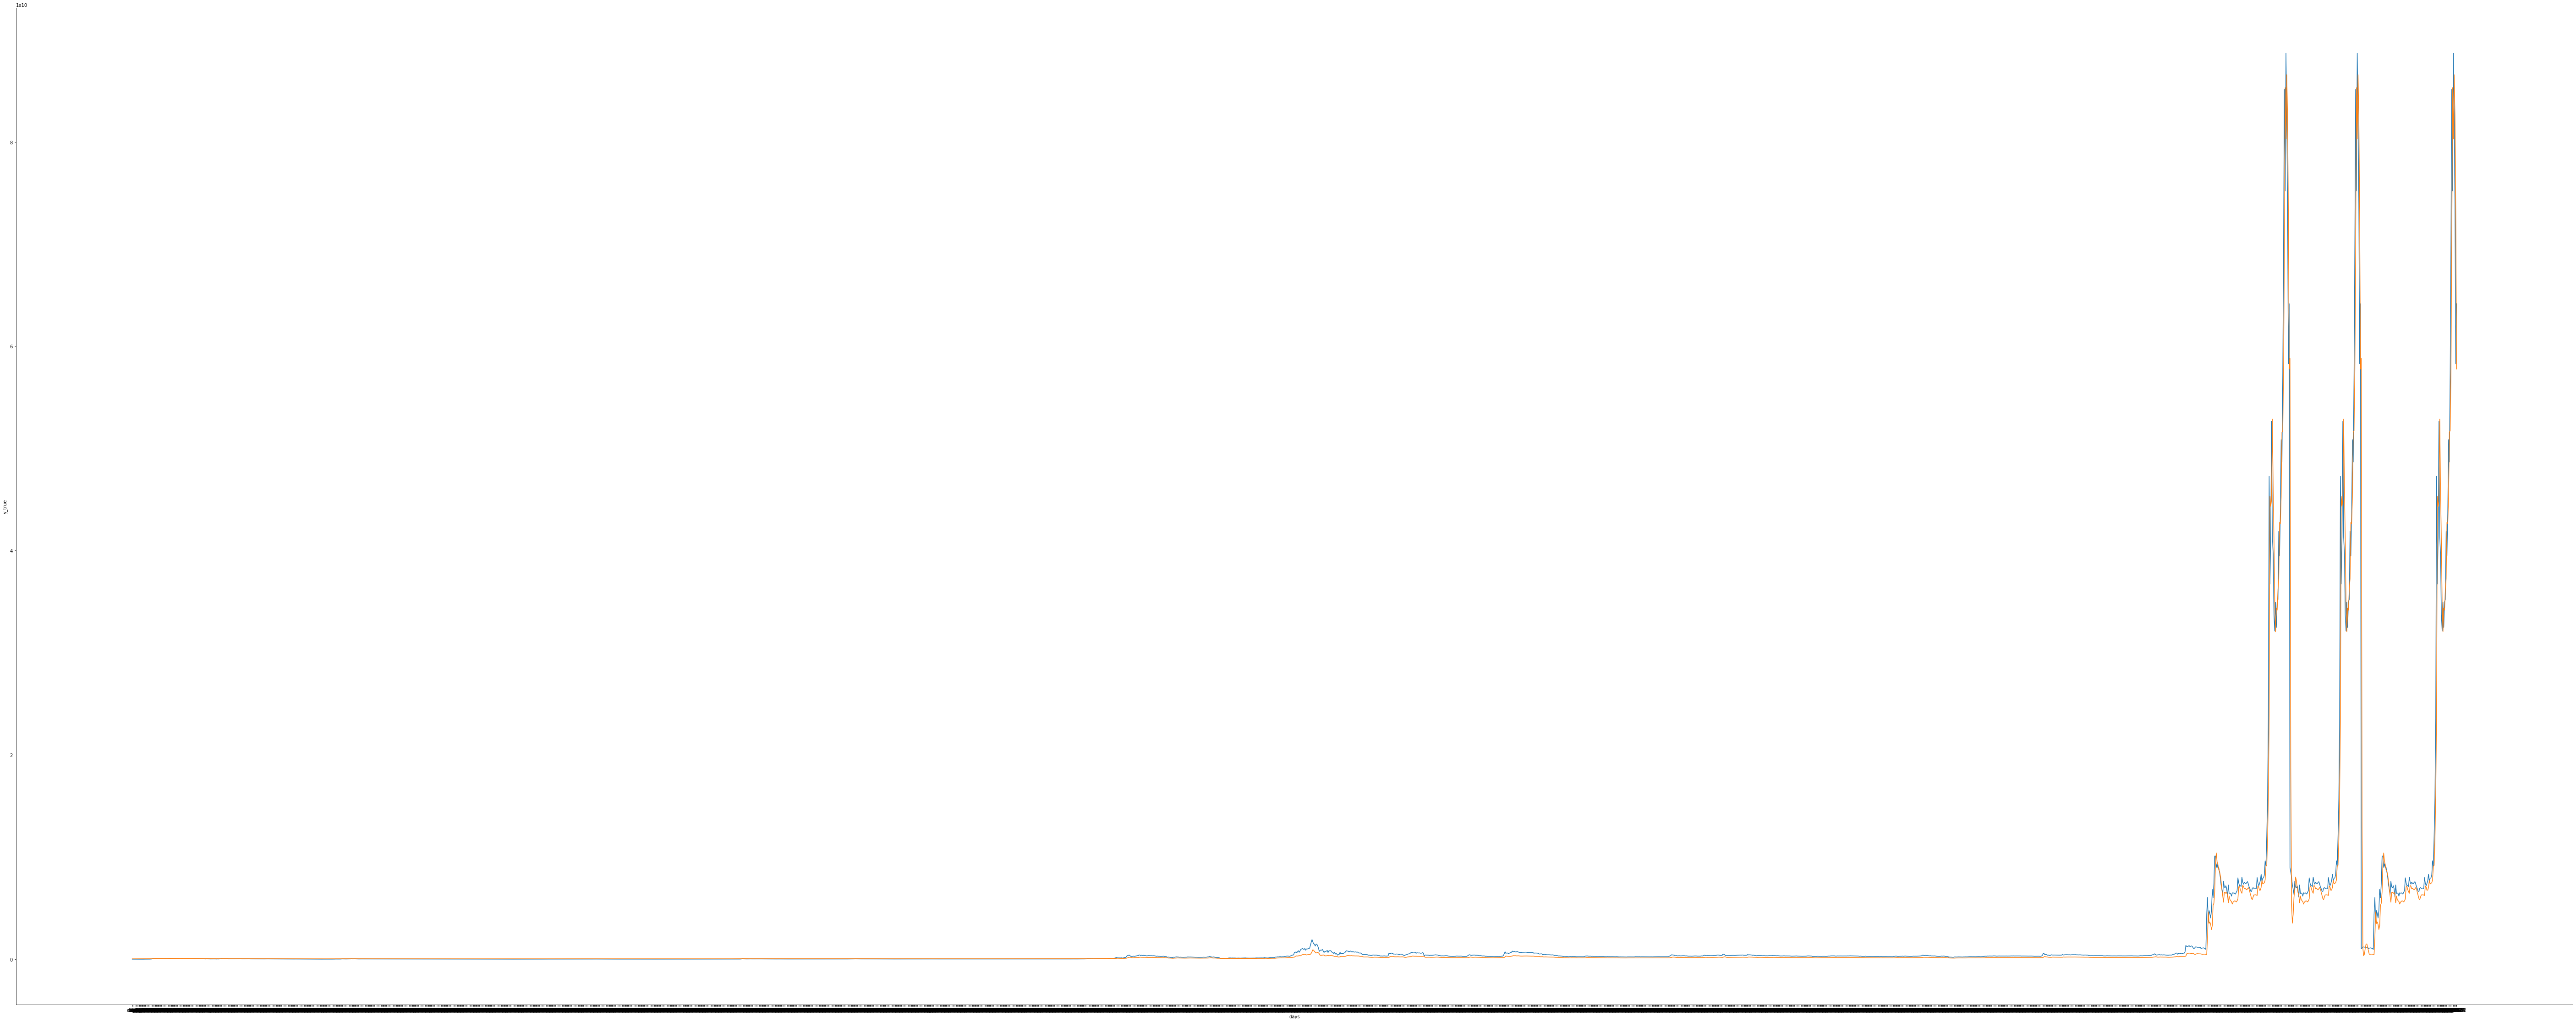

In [59]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (100,40)

sns.lineplot(data = comparison, x = 'days', y = 'y_true', legend=True)
sns.lineplot(data = comparison, x = 'days', y = 'y_pred', legend=True)

plt.savefig('comparison.png')